In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
import pandas as pd

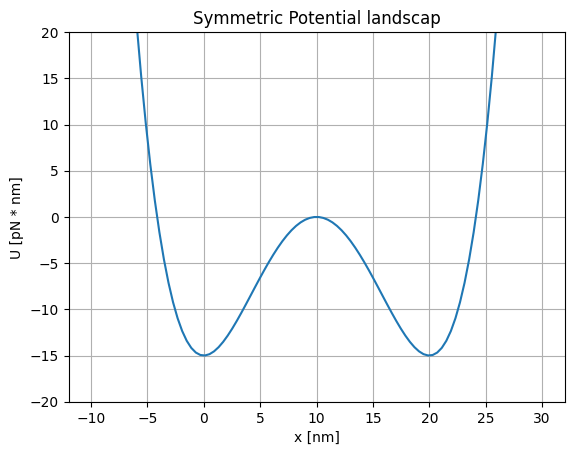

In [3]:
## Potential symmetric profile  - Folded state set on 0

x_drag = 10 #nm
dG_drag = 15 # pN* nm
F0_05 = 8* 5 #pN  # Force at equal F,U rate -> symmetric potential graph 

def potential_0(x):
    return 4 * dG_drag * (1/4 * ((x- x_drag)/ x_drag)**4 - 0.5 *((x - x_drag)/ x_drag)**2 )

x_values = np.linspace(-10, 30, 100)  
U_values = potential_0(x_values)

plt.plot(x_values, U_values)
plt.title("Symmetric Potential landscap")
plt.xlabel("x [nm]")
plt.ylabel("U [pN * nm]")
plt.ylim(-20, 20)
plt.grid("True")
plt.show()

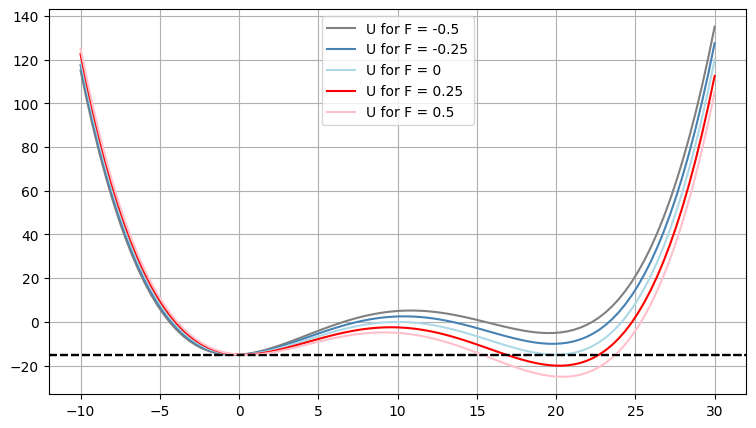

In [4]:
# TILTING: adding F contribution to moduate potential landscape 
colors = ['grey', 'steelblue', 'lightblue', "red", "pink", "green"]
x_values = np.linspace(-10, 30, 100)  

def potential(x, F):
    return potential_0(x) - F *x 

plt.figure(figsize=(9, 5))

for i , F in enumerate ((-0.5, -0.25, 0, 0.25, 0.5)):
    potential_values =  potential(x_values, F)
    plt.plot(x_values, potential_values,color=colors[i],  label = f"U for F = {F}")
    plt.legend()
    plt.grid("True")
    plt.axhline( y = - dG_drag, linestyle="--", color = "black")

plt.show()

# with F0> 0 favorisco la cinetic di unfolding. F positivo, retta a pendenza negativa per il  segno 


In [5]:
# LANGEVIN : deterministic + thermal noise 

D  = 3000 # nm**2/s 
kT = 4.11 # pN* nm
dt =  10**(-5)
x0 = 0                  # thats y we shifted (also for tilting)
N_steps= 1_000_000


Mean ⟨x⟩: 65.74175678918658
Mean ⟨x²⟩: 12491.76646837024
Expected ⟨x²⟩ (2Dt): 60000.0
Error in ⟨x²⟩: 0.7918038921938294


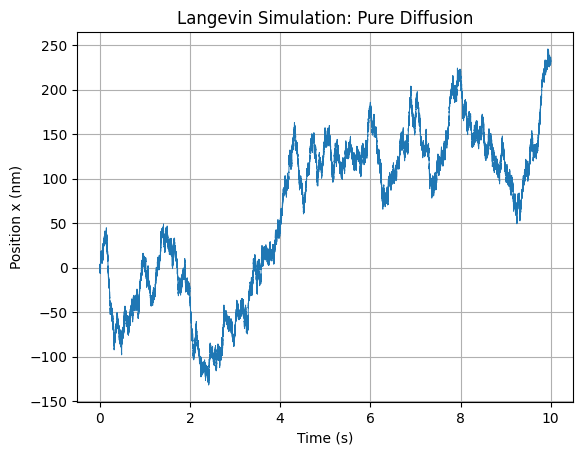

In [6]:
#  PURE DIFFUSION LANGEVIN  F = dudx =  0 with 2 forloops
# check point <x> = 0 ; <x2> = 2Dt 

x = np.zeros(N_steps)
x[0] = 0
for i in range(1, N_steps):
    x[i] = x[i-1] + np.sqrt(2 * D * dt) *np.random.normal(0,1)

time_values = np.arange(N_steps) * dt
expected_x2 = 2 * D * (N_steps * dt)
mean_x2 =  np.mean(( x -  x[0])**2)
print("Mean ⟨x⟩:", np.mean(x))
print("Mean ⟨x²⟩:", mean_x2)
print("Expected ⟨x²⟩ (2Dt):", expected_x2)
print("Error in ⟨x²⟩:", abs((np.mean(mean_x2) - expected_x2)/ expected_x2))

plt.plot(time_values, x, lw=0.7, label="Langevin Trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Position x (nm)")
plt.title("Langevin Simulation: Pure Diffusion")
plt.grid()
plt.show()

## how to interprete +30 in x?? 

In [7]:
# for loops langevin 
## D/kbT = viscosity
# du0dx = potential gradient 

'''
D, dG_drag, F = 3000, 15, 0.25
dt = 5*10**(-6) 
N_steps =  300_000_000
t_values = np.arange(N_steps) * dt

step = np.linspace(-10, 30, N_steps-1)
x =  np.zeros(N_steps)
x[0]=0
for i in range(1, N_steps):
    du0dx = 4 * dG_drag*  ((1/x_drag)*((x[i-1] - x_drag)/ x_drag)**3 - (1/x_drag)*((x[i-1] - x_drag)/ x_drag))
    dudx = du0dx - F
    x[i] = x[i-1] - (D/kT) * dudx * dt  + np.sqrt(2 * D * dt) * np.random.normal(0, 1)

# plt.figure(figsize=(11, 5))
# plt.plot(t_values, x, lw=0.7, label = f"D: {D}, dG: {dG_drag}, F: {F}")
# plt.xlabel("Time")
# plt.ylabel("Position x")
# plt.title("Langevin Simulation")
# plt.grid()
# plt.legend()
# plt.show()

# partial sampling 
### save only every 100th point
n = np.arange(0, N_steps, 100)
t_values = n * dt
x_values = x[n]
data = np.column_stack((t_values, x_values))
filename = f"langevinSimulation_F{F}.npz" 
if os.path.exists(filename):
    loaded = np.load(filename)
    old_data = loaded["data"]
    data = np.vstack((old_data, data))  # appendo in verticale

# Salvo tutto (sovrascrivendo il file)
np.savez_compressed(filename, header="Time, Position_x", data=data)

'''

'\nD, dG_drag, F = 3000, 15, 0.25\ndt = 5*10**(-6) \nN_steps =  300_000_000\nt_values = np.arange(N_steps) * dt\n\nstep = np.linspace(-10, 30, N_steps-1)\nx =  np.zeros(N_steps)\nx[0]=0\nfor i in range(1, N_steps):\n    du0dx = 4 * dG_drag*  ((1/x_drag)*((x[i-1] - x_drag)/ x_drag)**3 - (1/x_drag)*((x[i-1] - x_drag)/ x_drag))\n    dudx = du0dx - F\n    x[i] = x[i-1] - (D/kT) * dudx * dt  + np.sqrt(2 * D * dt) * np.random.normal(0, 1)\n\n# plt.figure(figsize=(11, 5))\n# plt.plot(t_values, x, lw=0.7, label = f"D: {D}, dG: {dG_drag}, F: {F}")\n# plt.xlabel("Time")\n# plt.ylabel("Position x")\n# plt.title("Langevin Simulation")\n# plt.grid()\n# plt.legend()\n# plt.show()\n\n# partial sampling \n### save only every 100th point\nn = np.arange(0, N_steps, 100)\nt_values = n * dt\nx_values = x[n]\ndata = np.column_stack((t_values, x_values))\nfilename = f"langevinSimulation_F{F}.npz" \nif os.path.exists(filename):\n    loaded = np.load(filename)\n    old_data = loaded["data"]\n    data = np.vst

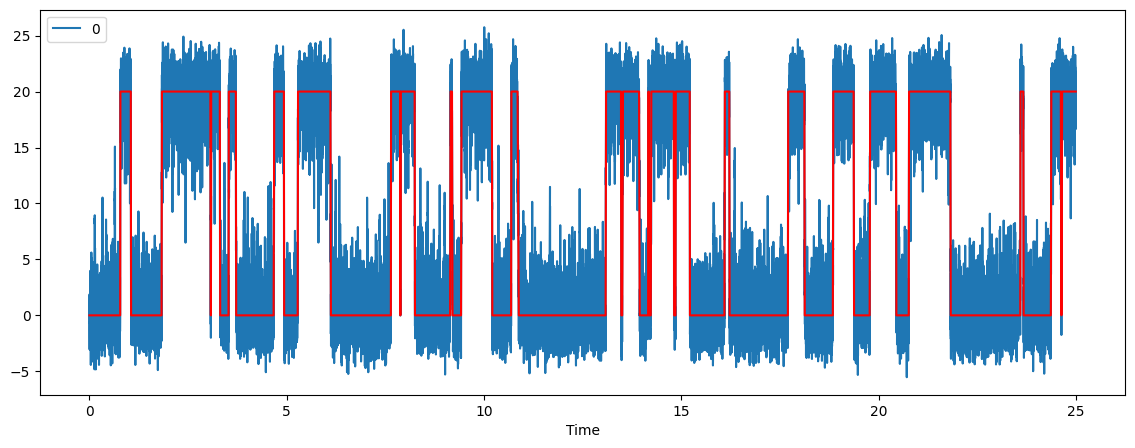

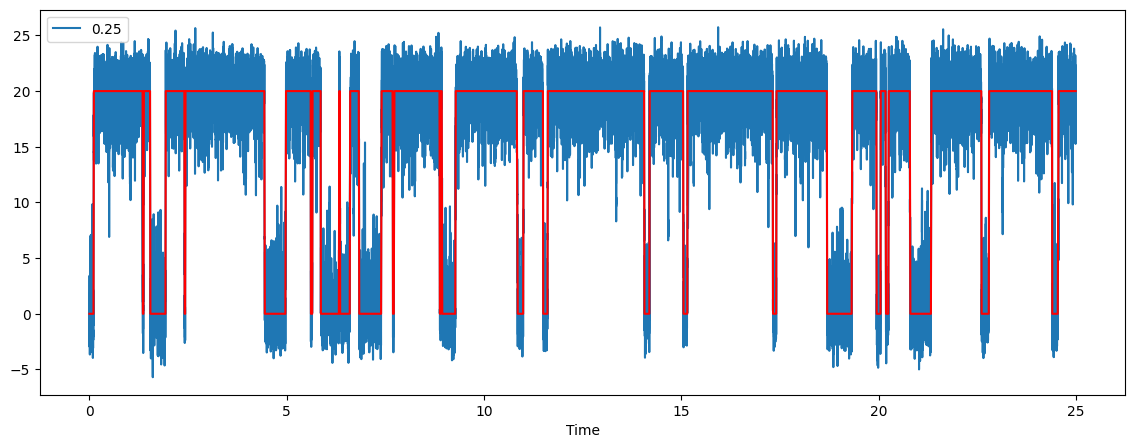

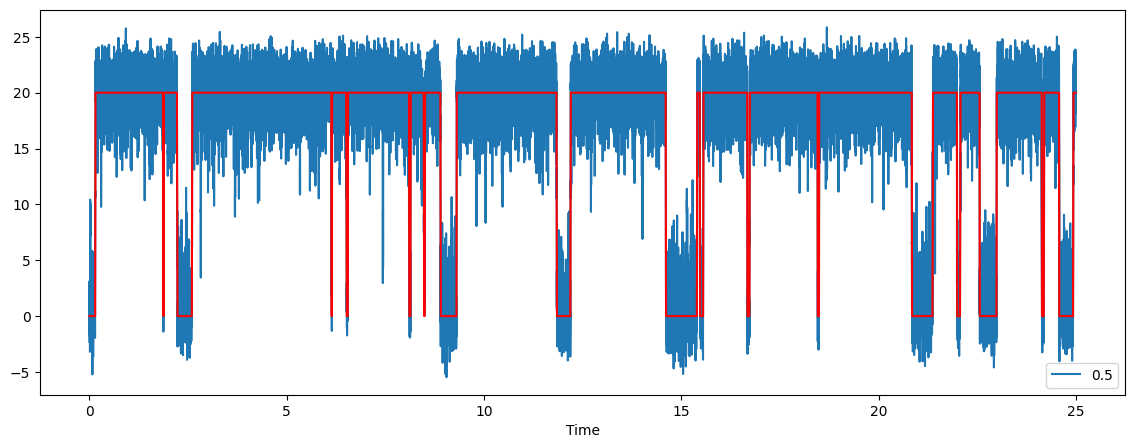

In [8]:
# # #loading back 
for F in (0, 0.25, 0.5): 
    filename = f"langevinSimulation_F{F}.npz"
    loaded = np.load(filename)
    my_array = loaded["data"]
    df = pd.DataFrame(my_array, columns=["Time", "Position_x"])
    
    x = df["Position_x"].values
    t = df["Time"].values
    mask = np.full_like(x, np.nan)
    mask[x < 2] = 0       # folded
    mask[x > 18] = 20  

    valid = ~np.isnan(mask[:50000])
    plt.figure(figsize=(14, 5))
    ax = plt.gca() 
    df.iloc[:50000, :50000].plot(x=df.columns[0], y=df.columns[1], ax=ax, label= f'{F}')
    plt.plot(t[:50000][valid], mask[:50000][valid], label="State mask (0/20)", 
             color='red', linewidth=1.5)   
    plt.show()

In [23]:
## SAVING TIME LIST 
up_threshold = 18
low_threshold = 2
result_style = []
F_list = [-0.5, -0.25, 0, 0.25, 0.5]

filename = f'langevinSimulation_F{F}.npz'


def process_file(filename):
## fortran file 
    data = np.loadtxt(filename)
## uncomment for npz python file
    #loaded = np.load(filename)   
    #data = loaded["data"]
    t = data[:, 0]
    x = data[:, 1]

    # STEP 1: Mappatura in stati binari: 0 (folded), 20 (unfolded), NaN altrove
    state = np.full_like(x, np.nan)
    state[x < low_threshold] = 0       # folded
    state[x > up_threshold] = 20       # unfolded

    # STEP 2: Rimuovi i punti ambigui (NaN → zona intermedia)
    valid_indices = ~np.isnan(state)
    state = state[valid_indices]
    t = t[valid_indices]

    # STEP 3: Loop per identificare transizioni e calcolare dwell times
    t_fold = []     # da unfolded (20) → folded (0)
    t_unfold = []   # da folded (0) → unfolded (20)

    last_state = state[0]
    last_time = t[0]

    for i in range(1, len(state)):
        if state[i] != last_state:
            dt = t[i] - last_time

            if last_state == 20 and state[i] == 0:
                t_unfold.append(dt)
            elif last_state == 0 and state[i] == 20:
                t_fold.append(dt)

            last_state = state[i]
            last_time = t[i]

    # Ultimo segmento (facoltativo)
    dt = t[-1] - last_time
    if last_state == 20:
        t_unfold.append(dt)
    elif last_state == 0:
        t_fold.append(dt)

    # STEP 4: Calcolo dei rate
    min_dwell = 0.0 # filtro contro rumore
    t_fold = [dt for dt in t_fold if dt >= min_dwell]
    t_unfold = [dt for dt in t_unfold if dt >= min_dwell]

    folding_rate = 1 / np.mean(t_unfold) if t_fold else 0
    unfolding_rate = 1 / np.mean(t_fold) if t_unfold else 0


    return F, folding_rate, unfolding_rate, t_unfold, t_fold 

## PYTHON DATA 
# results = []
# for F in F_list:
#     F, folding_rate, unfolding_rate, t_up_list, t_down_list = process_file(f'langevinSimulation_F{F}.npz')
    
#     results.append({
#         "F": F,
#         "folding_rate": folding_rate,
#         "unfolding_rate": unfolding_rate,
#         "t_up_list": t_up_list,
#         "t_down_list": t_down_list
#     })

# df = pd.DataFrame(results)
# df

### FORTRAN DATA
results = []
for F in (-2, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 2):
    F, folding_rate, unfolding_rate, t_up_list, t_down_list = process_file(f'trajectoryF{F}')

    results.append({
        "F": F,
        "folding_rate": folding_rate,
        "unfolding_rate": unfolding_rate,
        "t_up_list": t_up_list,
        "t_down_list": t_down_list
    })

df_fortran = pd.DataFrame(results)
df_fortran.to_pickle("dati_fortran.pkl")
df_fortran


,F,folding_rate,unfolding_rate,t_up_list,t_down_list
0,-2.00,18.681687,0.001166,"[0.04998799999998482, 0.10003899999992427, 0.0...","[533.200000003, 466.64996300000007, 754.199890..."
1,-1.50,14.096376,0.009543,"[0.04999920000000202, 0.050003000000003794, 0....","[45.299998503, 199.2999993, 67.75, 224.4999699..."
2,-1.00,9.545452,0.077740,"[0.1500000900000007, 0.10000040000000254, 0.14...","[5.649999813, 16.949999299999998, 16.550001199..."
3,-0.50,4.955827,0.494080,"[0.14999997399999987, 0.19999980999999956, 0.2...","[0.849999979, 3.54999995, 3.7999997200000006, ..."
4,-0.25,3.256889,0.987707,"[0.25000003000000004, 0.049999950000000126, 0....","[0.249999985, 1.900000038, 0.8999998599999999,..."
5,0.00,2.210126,2.262489,"[0.451499962, 0.36549991700000006, 0.626000039...","[0.118499995034, 0.37600004600000003, 0.292500..."
6,0.25,1.205202,3.866830,"[0.2615000009999999, 0.4604999999999999, 0.981...","[0.621499979034, 0.5249999800000001, 0.6084999..."
7,0.50,0.481963,4.884882,"[0.34999999400000004, 3.5499998299999995, 1.09...","[0.049999997, 0.699999992, 0.5999999000000003,..."
8,1.00,0.073970,9.514321,"[6.599999623, 10.599999389999999, 15.850000399...","[0.050000189999999556, 0.10000040000000254, 0...."
9,1.50,0.008748,14.466068,"[240.700000003, 64.550003, 283.75, 40.04998699...","[0.09999099999998862, 0.10000600000000759, 0.0..."


In [10]:
from scipy.optimize import minimize_scalar
from scipy.integrate import quad


# KRAMER PARAMS 
D, kT =  3000, 4.11 # nm2/s
dG_drag = 15 #pN nm (= 3kT)
A, B = 1/4, 1/2
k = 4.11
F_list = [-2, -1.5, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 1.5, 2]


def U (x):
    z = (x - x_drag) / x_drag
    return 4 * dG_drag * (A * z**4 - B * z**2) - F * x

def dU (x):
    z = (x - x_drag) / x_drag
    return 4 * dG_drag * (1 / x_drag) * (4 * A * z**3 - 2 * B * z) - F

def d2U (x):
    z = (x - x_drag) / x_drag
    return 4 * dG_drag * (1 / x_drag**2) * (12 * A * z**2 - 2 * B)

# kramer for reaction rate transition 
def kramer(D, dG, w_a, w_b, kT):
   return (w_a *  w_b * D) / (2 * np.pi * kT) * np.exp(- dG/ kT)  

kramer_result = [] 

for F in F_list:
    res1 = minimize_scalar(U, bounds=(-1, +1), method='bounded') #minimo sx
    x_folded = res1.x
    res2 = minimize_scalar(U, bounds=(19, 21), method='bounded') #minimo dx
    x_unfolded = res2.x
    res_barrier = minimize_scalar(lambda x: -U(x), bounds=(9.5, 10.5), method='bounded') #max
    x_top = res_barrier.x

    dG_fold = U(x_top) - U(x_unfolded)
    dG_unfold = U(x_top) - U(x_folded) 

    linear_dG = dG_drag - F* x_top  

    # freq calcolata con quanto è ripida la curvatura
    w_a1 = np.sqrt(d2U(x_folded)) #rate per uscire dallo stato di folded 
    w_a2 = np.sqrt(d2U(x_unfolded))
    w_b = np.sqrt(abs(d2U(x_top)))

    k_fold = kramer(D, dG_fold, w_a1, w_b, kT)
    k_unfold = kramer(D, dG_unfold, w_a2, w_b, kT)
#------------------------------------------
    from scipy.integrate import quad

    def mfpt(x, x_a, x_b, U, kT, D):    
    # Inner integral over z from x_a to y
        def inner_integral(y):
            result, _ = quad(lambda z: np.exp(-U(z) / kT), x_a, y)
            return result
    
    # Outer integral over y from x to x_b
        def outer_integral():
            result, _ = quad(lambda y: np.exp(U(y) / kT) * inner_integral(y), x, x_b)
            return result
    
        return outer_integral() / D
    

    mfpt_value = mfpt(x_folded, x_folded - 5 , x_unfolded, U, kT, D)
    rate_unfold = 1 / mfpt_value
    mfpt_value2 = mfpt(x_unfolded, x_unfolded + 5, x_folded, U, kT, D)
    rate_fold = 1 / mfpt_value2


    rate_vs = 1/  mfpt(x_folded, x_folded - 5 , x_top, U, kT, D)



    kramer_result.append([F, dG_fold, dG_unfold, linear_dG, k_fold, k_unfold, x_folded, x_unfolded, x_top, rate_unfold, rate_fold, rate_vs ])


df_k = pd.DataFrame(kramer_result, columns=["F", "dG_fold", "dG_unfold", "linear_dG",  "kramer_fold", "kramer_unfold", "x_f", "x_u", "x_top", "mfpt_r_u", "mfpt_r_f", "rate_vs"])
df_k

,F,dG_fold,dG_unfold,linear_dG,kramer_fold,kramer_unfold,x_f,x_u,x_top,mfpt_r_u,mfpt_r_f,rate_vs
0,-2.00,-2.616420,37.263581,35.999988,212.845761,0.009588,-9.999960e-01,19.000004,10.499994,0.005344,43.138779,0.051238
1,-1.50,1.633585,31.513586,30.749991,75.679198,0.038843,-9.999960e-01,19.000004,10.499994,0.031712,26.638365,0.171317
2,-1.00,5.883982,25.811807,25.499994,26.049379,0.156412,-7.474444e-01,19.030131,10.499994,0.157685,14.124047,0.533401
3,-0.50,10.284007,20.275245,20.249997,8.513434,0.659542,-3.931748e-01,19.553930,10.499994,0.648187,6.180612,1.528029
4,-0.25,12.578737,17.577649,17.604348,4.746486,1.321004,-2.021615e-01,19.784768,10.417393,1.227364,3.793793,2.556645
5,0.00,15.000000,15.000000,15.000000,2.563005,2.563005,-3.898795e-07,20.000000,10.000000,2.212954,2.212954,4.548378
6,0.25,17.577649,12.578737,12.604348,1.321004,4.746486,2.152324e-01,20.202161,9.582607,3.793793,1.227364,7.751436
7,0.50,20.275245,10.284007,10.249997,0.659542,8.513434,4.460698e-01,20.393175,9.500006,6.180612,0.648187,11.562704
8,1.00,25.811807,5.883982,5.499994,0.156412,26.049379,9.698686e-01,20.747444,9.500006,14.124047,0.157685,22.738045
9,1.50,31.513586,1.633585,0.749991,0.038843,75.679204,9.999960e-01,20.999996,9.500006,26.638365,0.031712,39.993720


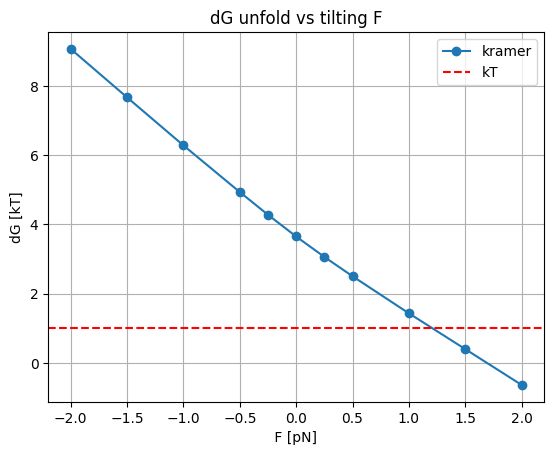

In [11]:
# # dG vs F (unfolding )

plt.plot(df_k["F"], df_k["dG_unfold"]/kT, label = "kramer", marker='o')
plt.axhline(1, label="kT", linestyle = "--", color ="red")

#plt.plot(df_k["F"], df_k["linear_dG"],label = "linear dG")

plt.ylabel("dG [kT]")
plt.xlabel(" F [pN] ")
plt.legend()
plt.title("dG unfold vs tilting F")
plt.grid(True)
plt.show()


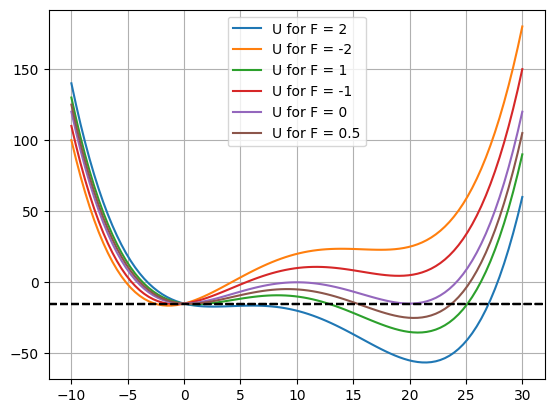

In [12]:
# check if dG is fine 
# F CRITICAL 
F_list = [ 2, -2, 1, -1,  0, 0.5]
x_values = np.linspace(-10, 30, 100)  

for F in F_list:
    potential_values =  potential(x_values, F)
    plt.plot(x_values, potential_values,  label = f"U for F = {F}")
    #
    # plt.ylim(-30,20)
    #plt.xlim(-5, 5)
    plt.legend()
    plt.grid("True")
    plt.axhline( y = - dG_drag, linestyle="--", color = "black")

plt.show()

In [13]:
## compute tau error : rate = 1/<tau> 
## mean tau error :
err_tau_u = np.std(t_up_list)/ np.sqrt(len(t_up_list))
err_tau_f = np.std(t_down_list)/ np.sqrt(len(t_down_list))

err_rate_u = err_tau_f / (np.mean(t_down_list))**2
err_rate_f = err_tau_u / (np.mean(t_up_list))**2

err_log_rate_f = err_rate_f / folding_rate
err_log_rate_u = err_rate_u /unfolding_rate

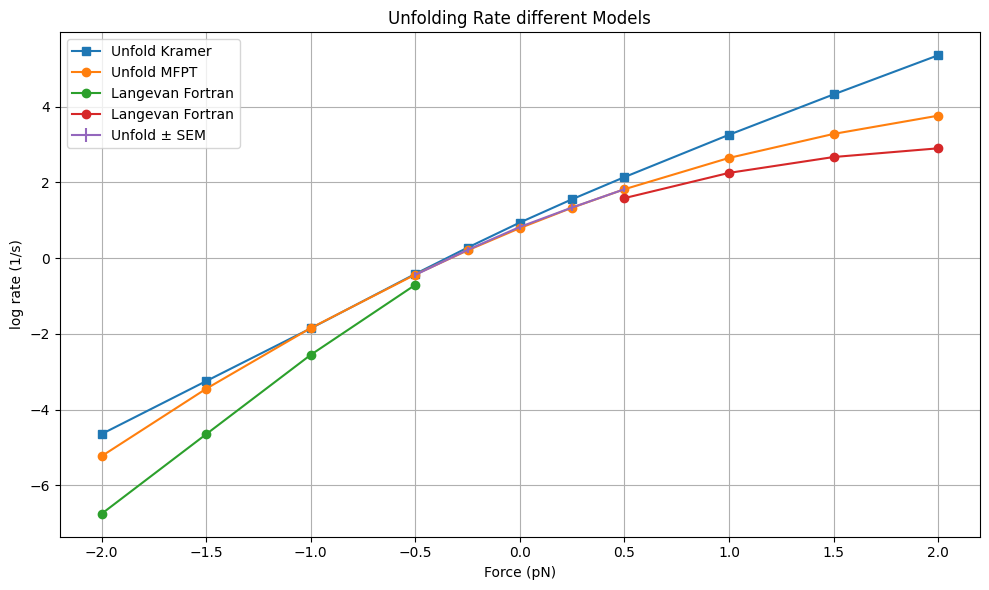

In [35]:
plt.figure(figsize=(10, 6))

# #kramer 
#plt.plot(df_k["F"], np.log(df_k["kramer_fold"]), label="Fold Kramer", marker='o')
plt.plot(df_k["F"], np.log(df_k["kramer_unfold"]), label="Unfold Kramer", marker='s')

# # # MFPT 
plt.plot(df_k["F"], np.log(df_k["mfpt_r_u"]), label="Unfold MFPT", marker='o')
#plt.plot(df_k["F"], np.log(df_k["rate_vs"]), label=" MFPT vs", marker='o')  # vs kramer bad approx 
#plt.plot(df_k["F"], np.log(df_k["mfpt_r_u"].iloc[::-1].reset_index(drop=True)), label="Fold MFPT", marker='o')

# simulation
subset = df_fortran.iloc[0:4]
subset2 = df_fortran.iloc[7:11]
#plt.plot(df_fortran["F"], np.log(df_fortran["folding_rate"]), label="Fold ", marker='o')
#plt.plot(df_fortran["F"], np.log(df_fortran["unfolding_rate"]),  label="Unfold", marker='s')
plt.plot(subset["F"], np.log(subset["unfolding_rate"]), marker="o", linestyle="-", label="Langevan Fortran")
plt.plot(subset2["F"], np.log(subset2["unfolding_rate"]), marker="o", linestyle="-", label="Langevan Fortran")
#plt.errorbar(df["F"], np.log(df["folding_rate"]), yerr = err_log_rate_f, label="Fold ± SEM")
plt.errorbar(df["F"], np.log(df["unfolding_rate"]), yerr = err_log_rate_u, label="Unfold ± SEM")

plt.xlabel("Force (pN)")
plt.ylabel("log rate (1/s)")
plt.title("Unfolding Rate different Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# decreasing the barrier (for UNF process) so moving to >>F, kramer'assumpton fails 

In [15]:
df = pd.read_csv("simulation_data.csv")
df

,F,folding_rate,unfolding_rate,t_up_list,t_down_list
0,-0.50,6.023502,0.642910,"[0.045500000000000096, 0.24049999999999994, 0....","[1.7839999999999998, 3.8139999999999996, 6.701..."
1,-0.25,3.941281,1.244025,"[0.14, 0.27249999999999996, 0.377, 0.109999999...","[0.7599999999999999, 0.13749999999999996, 0.06..."
2,0.00,2.256887,2.281420,"[0.27149999999999996, 1.2369999999999999, 0.22...","[0.7835, 0.7814999999999999, 0.012999999999999..."
3,0.25,1.228953,3.814343,"[1.2414999999999998, 0.16549999999999998, 0.47...","[0.11299999999999999, 0.023500000000000076, 0...."
4,0.50,0.659841,6.178414,"[1.7229999999999999, 0.345, 3.533, 0.371999999...","[0.1515, 0.010999999999999899, 0.3745000000000..."


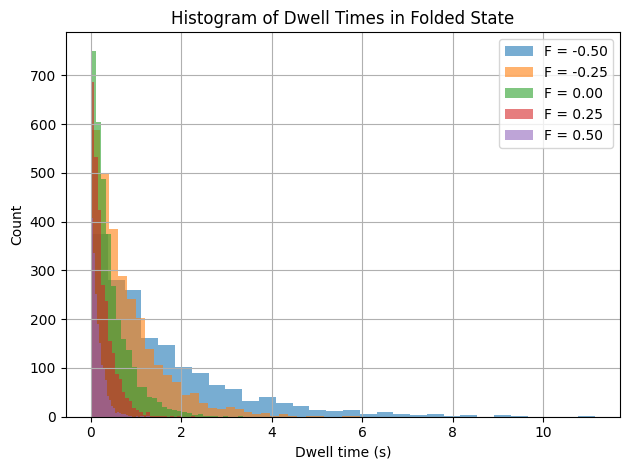

In [16]:
import ast

for idx, row in df.iterrows():
    t_down_list = ast.literal_eval(row["t_down_list"])  # converte la stringa in lista
    F = row["F"]
    plt.hist(t_down_list, bins=30, alpha=0.6, label=f"F = {F:.2f}")

plt.title("Histogram of Dwell Times in Folded State")
plt.xlabel("Dwell time (s)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

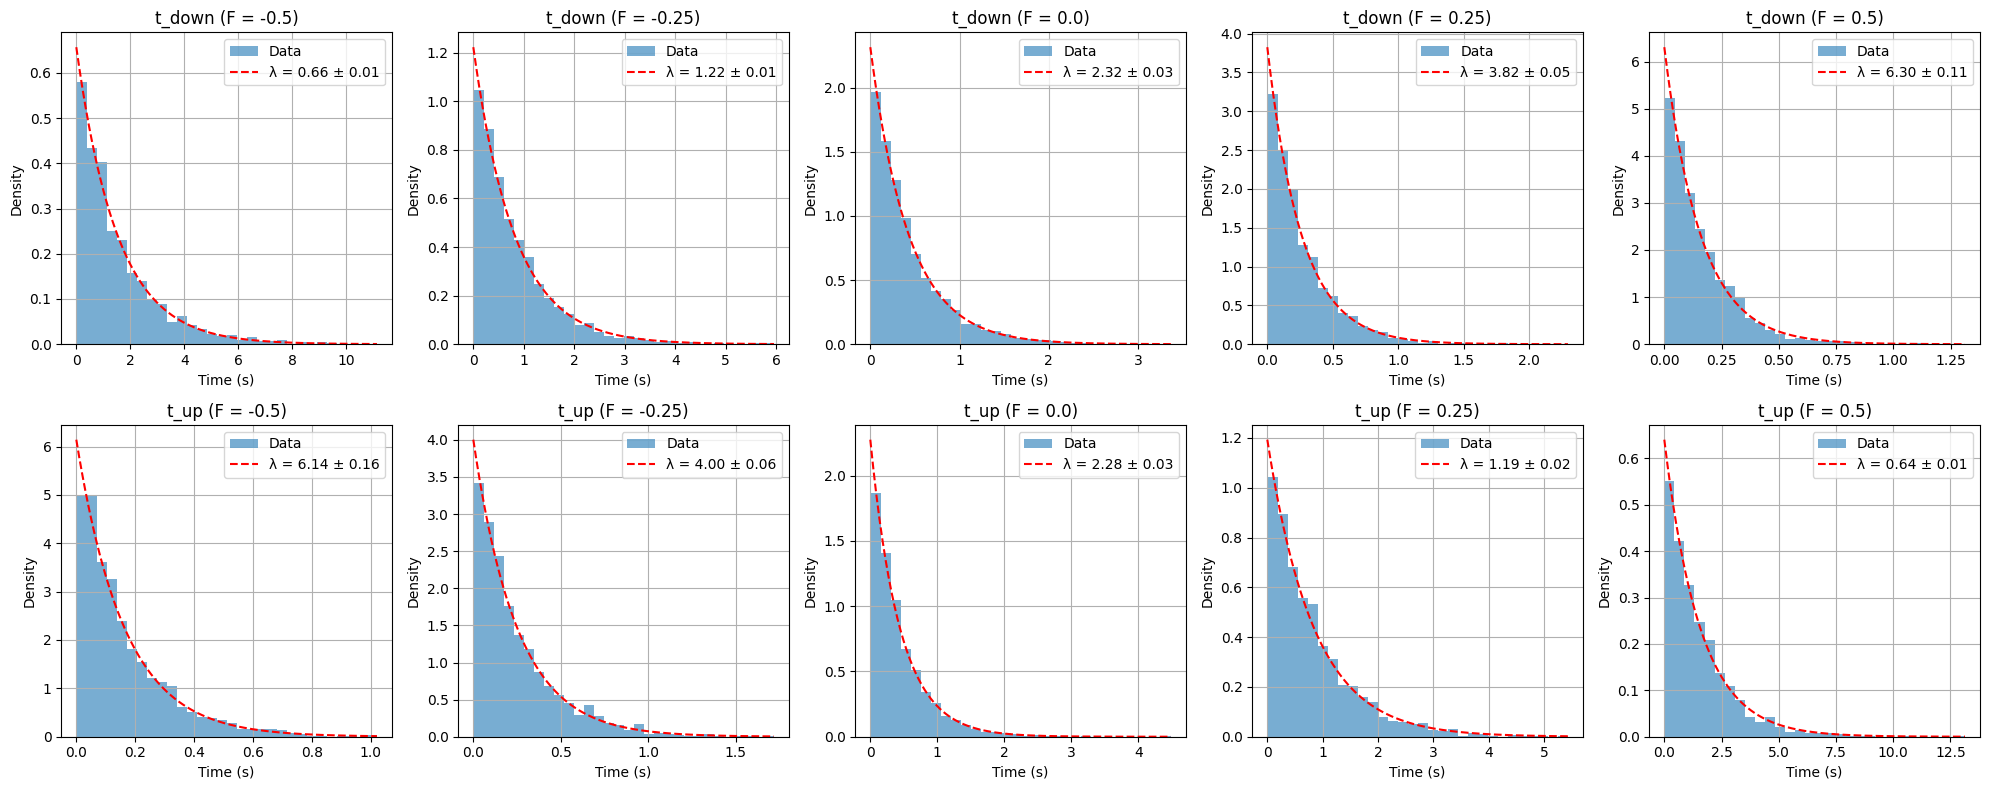

In [17]:
from scipy.optimize import curve_fit

def exp_pdf(t, lambd):
    return lambd * np.exp(-lambd * t)

# Colonne per salvare i fit
for direction in ["up", "down"]:
    df[f"lambda_{direction}"] = np.nan
    df[f"lambda_{direction}_err"] = np.nan

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, row in df.iterrows():
    F = row["F"]

    for j, direction in enumerate(["down", "up"]):
        t_list = np.array(ast.literal_eval(row[f"t_{direction}_list"]))   # se salvo df in csv devo convertire da strg a list!!
        ax = axes[j, i]

        # Istogramma
        counts, bins, _ = ax.hist(t_list, bins=30, density=True, alpha=0.6, label="Data")
        bin_centers = (bins[:-1] + bins[1:]) / 2

        # Fit
        popt, pcov = curve_fit(exp_pdf, bin_centers, counts, p0=[1 / np.mean(t_list)])
        lam = popt[0]
        lam_std = np.sqrt(pcov[0, 0])

        # Plot fit
        t_fit = np.linspace(0, max(t_list), 300)
        ax.plot(t_fit, exp_pdf(t_fit, lam), 'r--', label=f'λ = {lam:.2f} ± {lam_std:.2f}')

        ax.set_title(f"t_{direction} (F = {F})")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Density")
        ax.grid(True)
        ax.legend()

        # Salva i valori nel DataFrame
        df.at[i, f"lambda_{direction}"] = lam
        df.at[i, f"lambda_{direction}_err"] = lam_std

plt.tight_layout()
plt.show()


In [18]:
df
df_final = df.drop(columns=["t_up_list", "t_down_list"])

df_final

#1/rate =  mean dwell time obv 

,F,folding_rate,unfolding_rate,lambda_up,lambda_up_err,lambda_down,lambda_down_err
0,-0.50,6.023502,0.642910,6.141276,0.158305,0.656831,0.012487
1,-0.25,3.941281,1.244025,4.002850,0.061238,1.222946,0.014872
2,0.00,2.256887,2.281420,2.276247,0.025734,2.316387,0.026291
3,0.25,1.228953,3.814343,1.193043,0.019021,3.824308,0.052990
4,0.50,0.659841,6.178414,0.640408,0.008341,6.304869,0.106075


FOLDING:
  slope = -2.2353
  x‡ (fold) = -9.1870 nm
k0_f: 4.3304935168226115e+18
k0_u: 4.840735440977274e-18

UNFOLDING:
  slope = 2.2584
  x‡ (unfold) = 9.2821 nm


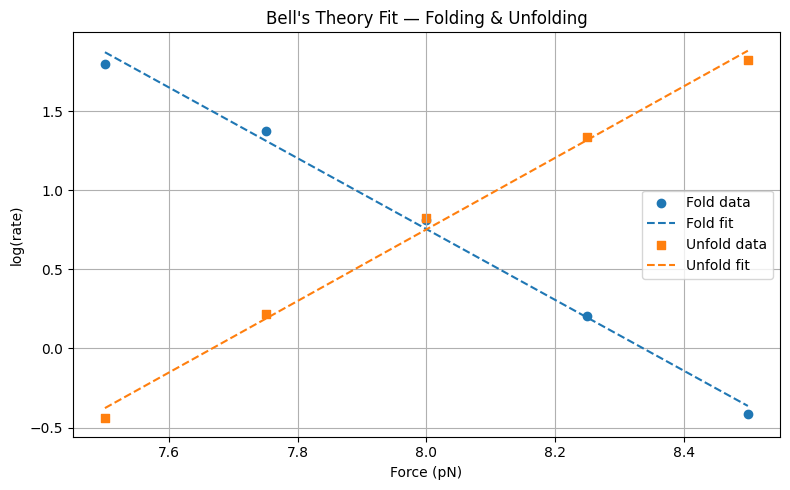

In [19]:
## Fit lineare per Bell (ln k vs F)
# lookin for x_dagger via LINEAR FITTING 

from scipy.stats import linregress

df_final["F_real"] = df_final["F"] + 8

fold_fit = linregress(df_final["F_real"], np.log(df_final["folding_rate"]))
unfold_fit = linregress(df_final["F_real"],np.log(df_final["unfolding_rate"]))

x_dag_fold = fold_fit.slope * kT
x_dag_unfold = unfold_fit.slope * kT 

logk0_fold = fold_fit.intercept  # rate at F = 0 == intercetta 
logk0_unfold = unfold_fit.intercept

# ----------- OUTPUT -------------
print("FOLDING:")
print(f"  slope = {fold_fit.slope:.4f}")
print(f"  x‡ (fold) = {x_dag_fold:.4f} nm")
print ("k0_f:", np.power(10,logk0_fold))
print("k0_u:", np.power(10,logk0_unfold))

print("\nUNFOLDING:")
print(f"  slope = {unfold_fit.slope:.4f}")
print(f"  x‡ (unfold) = {x_dag_unfold:.4f} nm")

plt.figure(figsize=(8,5))

plt.scatter(df_final["F_real"], np.log(df_final["folding_rate"]), label="Fold data", marker='o')
plt.plot(df_final["F_real"], fold_fit.intercept + fold_fit.slope * df_final["F_real"], label="Fold fit", linestyle="--")

plt.scatter(df_final["F_real"], np.log(df_final["unfolding_rate"]), label="Unfold data", marker='s')
plt.plot(df_final["F_real"], unfold_fit.intercept + unfold_fit.slope * df_final["F_real"], label="Unfold fit", linestyle="--")

plt.xlabel("Force (pN)")
plt.ylabel("log(rate)")
plt.title("Bell's Theory Fit — Folding & Unfolding")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# NO SENSE RATES VALUES FOR F=0 
# 